In [1]:
using PyPlot
using DataFrames
using CSV

In [2]:
include("./src/tmat.jl")
include("./src/latt_para.jl")

lattice_params! (generic function with 1 method)

In [3]:
function plot_tmat!(ax, w, params, a; label=false, n=2, ch="ch11", linestyle=:solid)
    mch = params[:mch]
    decons = params[:decons_vec]
    t = [tmat!(ww, mch, decons, a, n=n, ch=ch, rs="rs11") for ww in w]
    tt = abs.(t).^2
    ax.plot(w, tt, label=label, linestyle=linestyle)
    ax.set(xlabel=L"$E_{cm}$ [MeV]", ylabel=L"$|T|^2$")#, ylim=(minimum(tt), maximum(tt)))
end

plot_tmat! (generic function with 1 method)

In [4]:
latt_para = lattice_params!()

Dict{Symbol, Any} with 5 entries:
  :m_meson    => (203.655, 486.366)
  :threshold  => [1397.59, 1466.14, 1683.94, 1781.53]
  :decons_vec => [93.1531, 108.23, 119.217, 108.23]
  :L          => 0.0205243
  :mch        => [(203.655, 1193.94), (486.366, 979.777), (551.1, 1132.84), (48…

In [5]:
fitted_para = DataFrame(CSV.File("./out/fitted_para.csv"))

Row,name,para,para_err
,String3,Float64,Float64
1,a1,-1.79982,1.37929
2,a2,-2.0,0.157803
3,fϕ,92.9976,0.431615
4,f,1.15,0.0301707


In [6]:
a2ch = fitted_para.para[1:2]
fϕ, f = fitted_para.para[3:4]

2-element Vector{Float64}:
 92.99755359644679
  1.1499997497926902

In [7]:
params = copy(latt_para)
params[:decons_vec] = [fϕ, fϕ, fϕ, fϕ] .* f
params

Dict{Symbol, Any} with 5 entries:
  :m_meson    => (203.655, 486.366)
  :threshold  => [1397.59, 1466.14, 1683.94, 1781.53]
  :decons_vec => [106.947, 106.947, 106.947, 106.947]
  :L          => 0.0205243
  :mch        => [(203.655, 1193.94), (486.366, 979.777), (551.1, 1132.84), (48…

# 2 channels

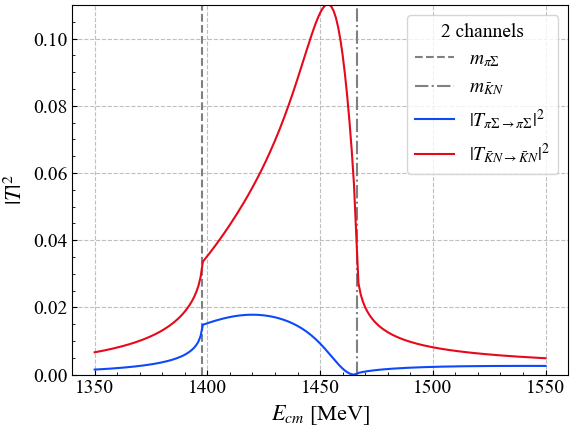

In [8]:
fig, ax = PyPlot.subplots()#(1, 2, figsize=(9, 3.5), layout="constrained")
w = 1350:1550
ax.set(ylim=(0, 0.11))
ax.vlines(params[:threshold][1], 0, 0.11, linestyles=:dashed, label=L"m_{\pi\Sigma}", color=:gray)
ax.vlines(params[:threshold][2], 0, 0.11, linestyles=:dashdot, label=L"m_{\bar{K}N}", color=:gray)



plot_tmat!(ax, w, params, a2ch, label=L"$|T_{\pi\Sigma\to\pi\Sigma}|^2$")
plot_tmat!(ax, w, params, a2ch, label=L"$|T_{\bar{K}N\to\bar{K}N}|^2$", ch="ch22")
ax.legend(title="2 channels")
ax.grid()
gcf()

# 4 channels

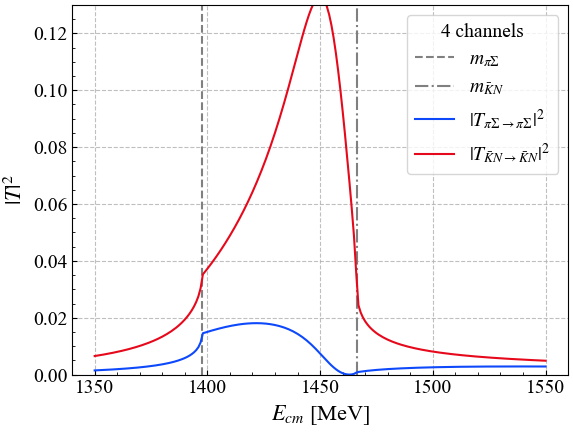

In [9]:
a4ch = [a2ch..., -2, -2]
fig, ax = PyPlot.subplots()#(1, 2, figsize=(9, 3.5), layout="constrained")
w = 1350:1550
ax.set(ylim=(0, 0.13))
ax.vlines(params[:threshold][1], 0, 0.13, linestyles=:dashed, label=L"m_{\pi\Sigma}", color=:gray)
ax.vlines(params[:threshold][2], 0, 0.13, linestyles=:dashdot, label=L"m_{\bar{K}N}", color=:gray)



plot_tmat!(ax, w, params, a4ch, label=L"$|T_{\pi\Sigma\to\pi\Sigma}|^2$", n=4)
plot_tmat!(ax, w, params, a4ch, label=L"$|T_{\bar{K}N\to\bar{K}N}|^2$", ch="ch22", n=4)

ax.legend(title="4 channels")
ax.grid()
gcf()

# Combine figure of 2-channel case and 4-channel case into one figure

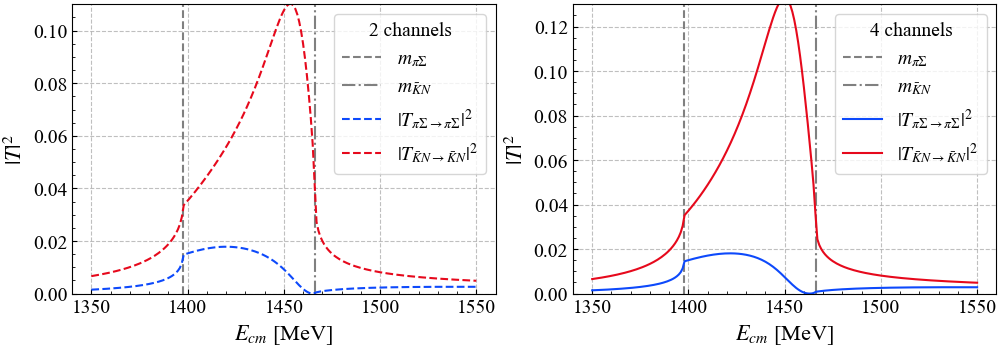

In [10]:
fig, ax = PyPlot.subplots(1, 2, figsize=(10, 3.5), layout="constrained")
w = 1350:1550
ax[1].set(ylim=(0, 0.11))
ax[1].vlines(params[:threshold][1], 0, 0.11, linestyles=:dashed, label=L"m_{\pi\Sigma}", color=:gray)
ax[1].vlines(params[:threshold][2], 0, 0.11, linestyles=:dashdot, label=L"m_{\bar{K}N}", color=:gray)



plot_tmat!(ax[1], w, params, a2ch, label=L"$|T_{\pi\Sigma\to\pi\Sigma}|^2$", linestyle=:dashed)
plot_tmat!(ax[1], w, params, a2ch, label=L"$|T_{\bar{K}N\to\bar{K}N}|^2$", ch="ch22", linestyle=:dashed)
ax[1].legend(title="2 channels")
ax[1].grid()

# 4 chhanels
a4ch = [a2ch..., -2, -2]
#fig, ax = PyPlot.subplots()#(1, 2, figsize=(9, 3.5), layout="constrained")
ax[2].set(ylim=(0, 0.13))
ax[2].vlines(params[:threshold][1], 0, 0.13, linestyles=:dashed, label=L"m_{\pi\Sigma}", color=:gray)
ax[2].vlines(params[:threshold][2], 0, 0.13, linestyles=:dashdot, label=L"m_{\bar{K}N}", color=:gray)



plot_tmat!(ax[2], w, params, a4ch, label=L"$|T_{\pi\Sigma\to\pi\Sigma}|^2$", n=4)
plot_tmat!(ax[2], w, params, a4ch, label=L"$|T_{\bar{K}N\to\bar{K}N}|^2$", ch="ch22", n=4)

ax[2].legend(title="4 channels")
ax[2].grid()
fig.savefig("./figure/T11_T22_LO.pdf")
gcf()